In [7]:
# !pip install tensorflow

In [8]:
# !pip install opencv-python

In [41]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
img_array = cv2.imread("./Dataset/Face_mask/00000/00000_Mask.jpg")

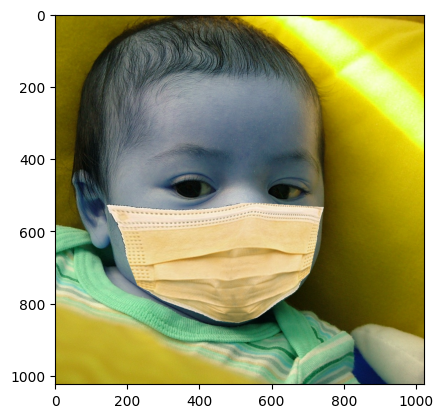

In [3]:
plt.imshow(img_array) #BGR image

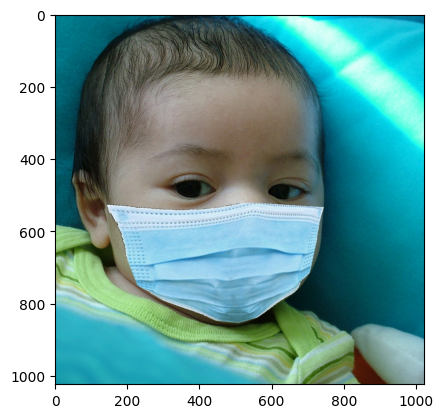

In [4]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)) #BGR to RGB

In [5]:
img_array.shape

(1024, 1024, 3)

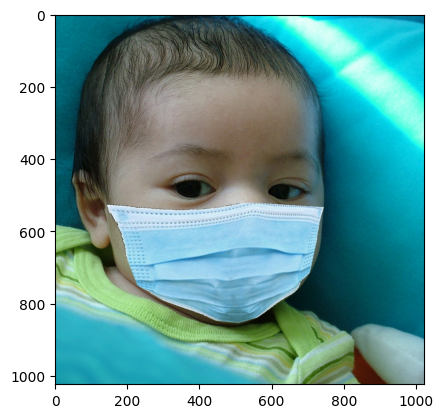

In [6]:
## Read all the images from directory
data_directory = "Dataset/"
Classes = ["Face_mask/00000","No_Face_mask/00000"]
for category in Classes:
    path = os.path.join(data_directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        # print(img_array)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [7]:
"""Resize the images from 1024*1024 -> 224* 224 for using image classifier as we are using the pre-trained 
image classifiers and going with the concept of transfer learning""" 

'Resize the images from 1024*1024 -> 224* 224 for using image classifier as we are using the pre-trained \nimage classifiers and going with the concept of transfer learning'

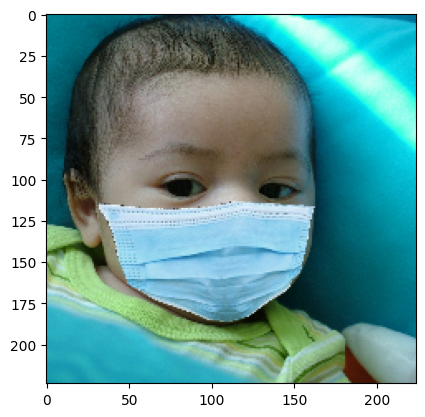

In [8]:
# RESIZE
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

## Converting all the images into array to prepare training data

In [10]:
training_data = []
data_directory = "Dataset/"
Classes = ["Face_mask/00000","No_Face_mask/00000"]
img_size = 224

def create_training_data():
    for category in Classes:
        path = os.path.join(data_directory,category)
        class_num = Classes.index(category) ## this line will give labels (0,1)    
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num]) ## list -> list -> [numpy.array,index]
            except Exception as e:
                pass

In [ ]:
create_training_data()

In [12]:
import random
random.shuffle(training_data) ## prevent the overfitting

In [16]:
X = [] ## features/np.array
y = [] ## labels to the images

for features, index in training_data:
    X.append(features)
    y.append(index)

X = np.array(X).reshape(-1,img_size,img_size,3) 

In [17]:
X.shape ## this shows that 1950 imgs are there and each have (224,224,3) dimension

(1950, 224, 224, 3)

In [23]:
X = X/255 #normalize

In [42]:
Y = np.array(y)
Y

array(255)

In [27]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [43]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Deep learning model

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
#loading the image pre-trained classifiers
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [55]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Transfer learning

In [60]:
from tensorflow.keras.layers import Flatten, Dense, Activation

In [61]:
head_model = model.output
head_model = Flatten()(head_model)
head_model = Dense(1)(head_model)
head_model = Activation('sigmoid')(head_model)

new_model = Model(inputs=base_model.input, outputs=head_model)
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [56]:
base_input = model.input
base_output = model.layers[-4].output

In [57]:
"""reshapes input data into a one-dimensional array,
allowing compatibility between convolutional layers and fully connected layers in neural networks."""

flat_layer = layers.Flatten()(base_output)

In [58]:
final_output = layers.Dense(1)(flat_layer) # 0 or 1 output adding single output neuron

In [10]:
"""Sigmoid because it is used for binary classification and the probablity need not to be 1 here,
But in Softmax the probablity need to be 1 and it is used for multi class classfication"""

final_output = layers.Activation('sigmoid')(final_output)

In [11]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [12]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

## Setting binary classification - [Facemask, without mask]

In [13]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
new_model.fit(X,Y,epochs = 1,validation_split=0.1)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [18]:
new_model.save("New_Face_Detection_Model.keras")

## Checking for predictions

In [19]:
from keras.models import load_model
new_model = load_model('./New_Face_Detection_Model.keras')

In [20]:
frame = cv2.imread("./Dataset/Face_mask/00000/00105_Mask.jpg")

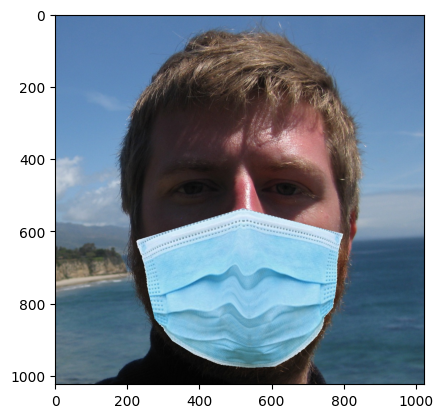

In [21]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [22]:
final_img = cv2.resize(frame,(224,224))
final_img = np.expand_dims(final_img,axis = 0)
final_img = final_img/255.0

In [23]:
predictions = new_model.predict(final_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [24]:
predictions

array([[3.201606e-11]], dtype=float32)

In [35]:
frame1 = cv2.imread("./Dataset/women.jpg")

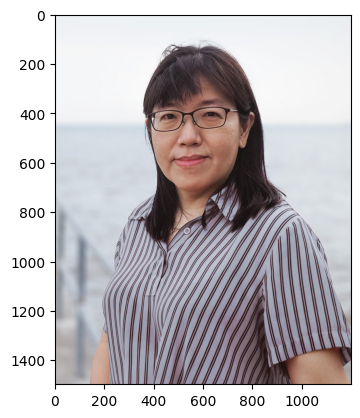

In [36]:
plt.imshow(cv2.cvtColor(frame1,cv2.COLOR_BGR2RGB))

In [37]:
final_img = cv2.resize(frame1,(224,224))
final_img = np.expand_dims(final_img,axis = 0)
final_img = final_img/255.0

In [38]:
predictions = new_model.predict(final_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [39]:
predictions[0][0]

0.9999983

## Haar Cascade object detection

In [6]:
frame = cv2.imread("./Dataset/women.jpg")

In [7]:
frame.shape

(1498, 1200, 3)

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

array([[237, 237, 237, ..., 235, 235, 235],
       [238, 238, 238, ..., 235, 235, 235],
       [238, 238, 238, ..., 235, 235, 235],
       ...,
       [176, 176, 176, ..., 181, 181, 182],
       [176, 176, 176, ..., 184, 184, 185],
       [176, 176, 176, ..., 184, 184, 185]], dtype=uint8)

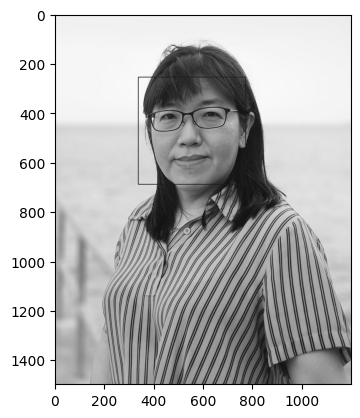

In [16]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

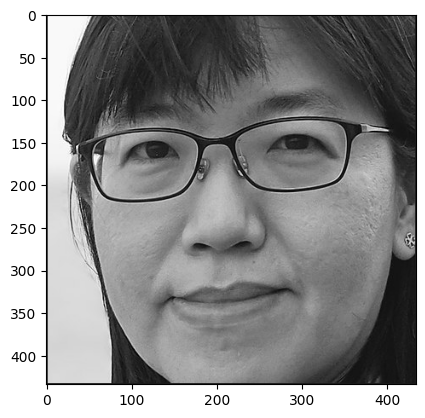

In [18]:
roi_gray = gray[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(roi_gray,cv2.COLOR_BGR2RGB))

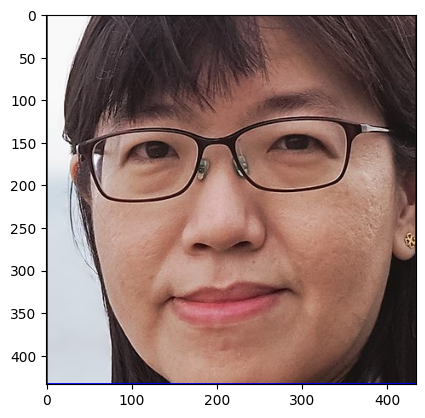

In [19]:
roi_color = frame[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB))

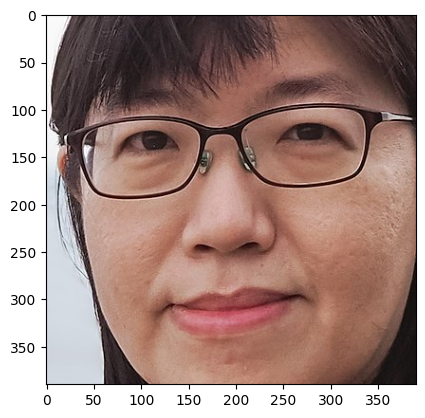

In [24]:
facess = faceCascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in facess:
    face_roi = roi_color[ey: ey+eh,ex:ex+ew]
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [11]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh,ex:ex+ew]

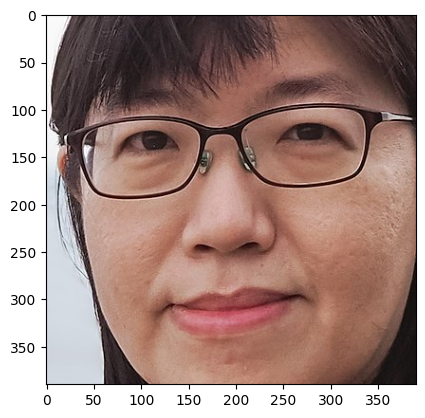

In [12]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [13]:
final_img = cv2.resize(face_roi,(224,224))
final_img = np.expand_dims(final_img,axis = 0)
final_img = final_img/255.0

In [14]:
predictions = new_model.predict(final_img)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)